# Medical Cost Prediction

# Data Preprocessing

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from scipy.stats import uniform, randint


In [ ]:
# Load dataset
df = pd.read_csv('insurance.csv')

In [ ]:
# see data first 5 records
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#check infomartion like datatypes and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#check null vlaues
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#check descriptive values of numerical cols
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data Analysis

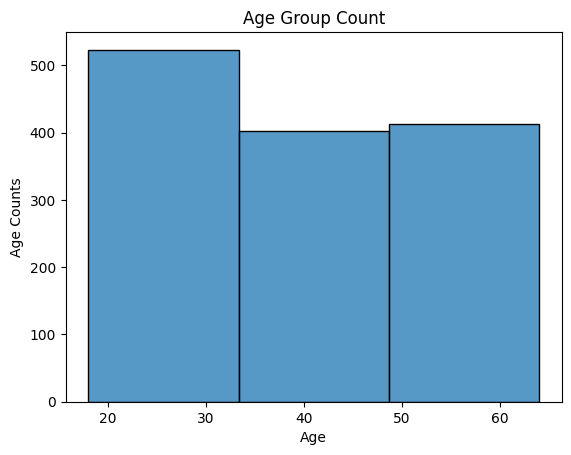

In [ ]:
# hist plot of Age
sns.histplot(x='age', data=df, bins=3,palette="deep")
plt.title('Age Group Count')
plt.xlabel('Age')
plt.ylabel('Age Counts')
plt.show()

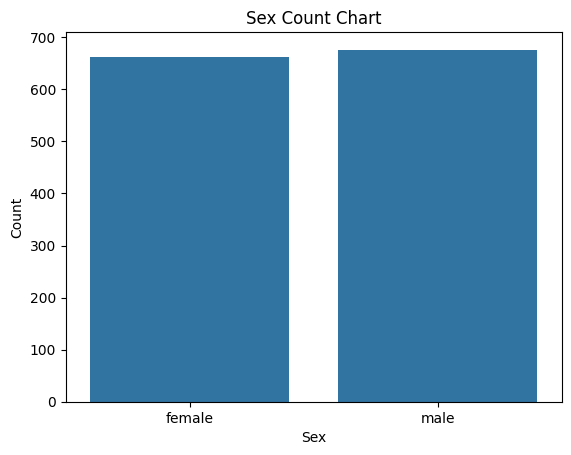

In [ ]:
# countplot of sex
sns.countplot(x='sex',data=df)
plt.title('Sex Count Chart')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


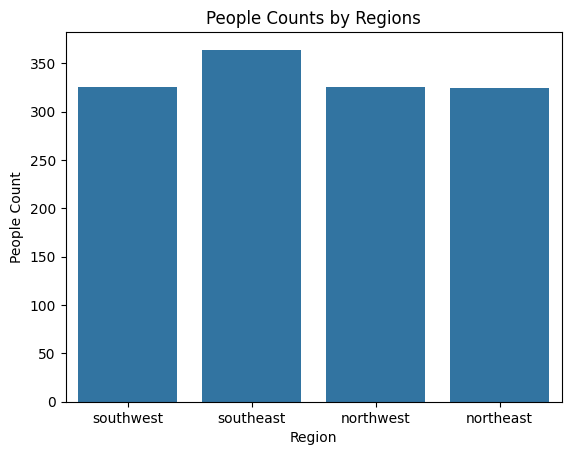

In [ ]:
#countplot of regions
sns.countplot(x='region',data=df)
plt.title('People Counts by Regions')
plt.xlabel('Region')
plt.ylabel('People Count')
plt.show()

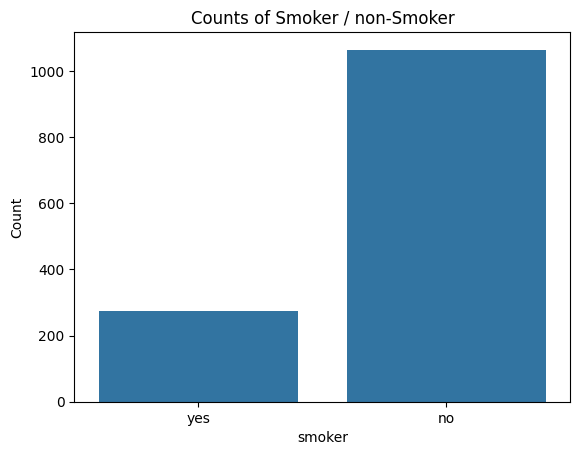

In [ ]:
# people counts of smokers
sns.countplot(x='smoker', data=df)
plt.title('Counts of Smoker / non-Smoker')
plt.xlabel('smoker')
plt.ylabel('Count')
plt.show()

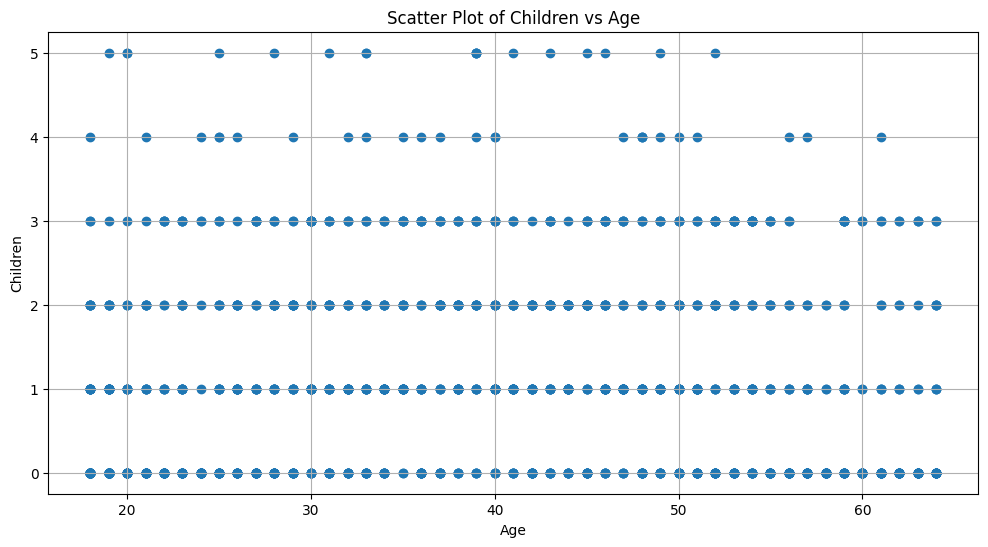

In [ ]:
# Scatter plot of children with age
plt.figure(figsize=(12, 6))
plt.scatter(df['age'], df['children'])
plt.title('Scatter Plot of Children vs Age')
plt.xlabel('Age')
plt.ylabel('Children')
plt.grid(True)
plt.show()

In [ ]:
#get categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
cat_cols

['sex', 'smoker', 'region']

In [ ]:
# Initialize the encoder
encoder = OrdinalEncoder()

# Fit and transform the data
df[cat_cols]=  encoder.fit_transform(df[cat_cols])

#print the encoded data
print(df)

# Specify the file path where you want to save the encoder
filename = 'ordinal_encoder.pkl'

# Open a file in binary write mode
with open(filename, 'wb') as f:
    # Use pickle to dump the encoder object into the file
    pickle.dump(encoder, f)


      age  sex     bmi  children  smoker  region      charges
0      19  0.0  27.900         0     1.0     3.0  16884.92400
1      18  1.0  33.770         1     0.0     2.0   1725.55230
2      28  1.0  33.000         3     0.0     2.0   4449.46200
3      33  1.0  22.705         0     0.0     1.0  21984.47061
4      32  1.0  28.880         0     0.0     1.0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50  1.0  30.970         3     0.0     1.0  10600.54830
1334   18  0.0  31.920         0     0.0     0.0   2205.98080
1335   18  0.0  36.850         0     0.0     2.0   1629.83350
1336   21  0.0  25.800         0     0.0     3.0   2007.94500
1337   61  0.0  29.070         0     1.0     1.0  29141.36030

[1338 rows x 7 columns]


In [ ]:
#convert float to int
df[cat_cols] = encoder.fit_transform(df[cat_cols]).astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']



In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [ ]:
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Model Selection

In [ ]:
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Lasso': {
        'model': Lasso(random_state=42),
        'params': {
            'alpha': uniform(0.01, 100)
        }
    },
    'Ridge': {
        'model': Ridge(random_state=42),
        'params': {
            'alpha': uniform(0.01, 100)
        }
    },
    'ElasticNet': {
        'model': ElasticNet(random_state=42),
        'params': {
            'alpha': uniform(0.01, 100),
            'l1_ratio': uniform(0.1, 0.9)
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [None, 3, 5, 7, 10],
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 5)
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'max_depth': [None, 3, 5, 7, 10],
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 5)
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'learning_rate': uniform(0.01, 1.0)
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 8)
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': randint(50, 201),
            'learning_rate': uniform(0.01, 0.2),
            'max_depth': randint(3, 8)
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': randint(3, 10),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },

}

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Function to calculate adjusted R^2 score
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Model Training

In [ ]:
# Function to evaluate a model
def evaluate_model(model, params, X_train, y_train, X_test, y_test):
    grid_search = RandomizedSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    grid_search.fit(X_train, y_train.values.ravel())

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    k = X_test.shape[1]
    adj_r2 = adjusted_r2_score(r2, n, k)

    mse = mean_squared_error(y_test, y_pred)

    print(f"Model: {best_model}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print(f"Adjusted R^2 Score: {adj_r2}")
    print("=======================================")

    return best_model, adj_r2

In [ ]:
# Dictionaries to store adjusted R² scores and best models
adjusted_r2_scores = {}
all_models = {}

for model_name, model_info in models.items():
    print(f"Evaluating and Training {model_name}...")
    best_model, adj_r2 = evaluate_model(model_info['model'], model_info['params'], X_train, y_train, X_test, y_test)
    adjusted_r2_scores[model_name] = adj_r2
    all_models[model_name] = best_model

    # Save the model
    with open(f"{model_name}.pkl", 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Model {model_name} saved to {model_name}.pkl")

Evaluating and Training LinearRegression...
Model: LinearRegression()
Best parameters: {}
Mean Squared Error: 33635210.431178406
R^2 Score: 0.7833463107364539
Adjusted R^2 Score: 0.7783657661556826
Model LinearRegression saved to LinearRegression.pkl
Evaluating and Training Lasso...
Model: Lasso(alpha=70.81725777960456, random_state=42)
Best parameters: {'alpha': 70.81725777960456}
Mean Squared Error: 33878254.395920195
R^2 Score: 0.7817807973669957
Adjusted R^2 Score: 0.7767642639731336
Model Lasso saved to Lasso.pkl
Evaluating and Training Ridge...
Model: Ridge(alpha=5.818361216819946, random_state=42)
Best parameters: {'alpha': 5.818361216819946}
Mean Squared Error: 33943234.61365718
R^2 Score: 0.7813622418199546
Adjusted R^2 Score: 0.7763360864594938
Model Ridge saved to Ridge.pkl
Evaluating and Training ElasticNet...
Model: ElasticNet(alpha=2.0684494295802445, l1_ratio=0.9729188669457949,
           random_state=42)
Best parameters: {'alpha': 2.0684494295802445, 'l1_ratio': 0.9729

# Model Evaluation

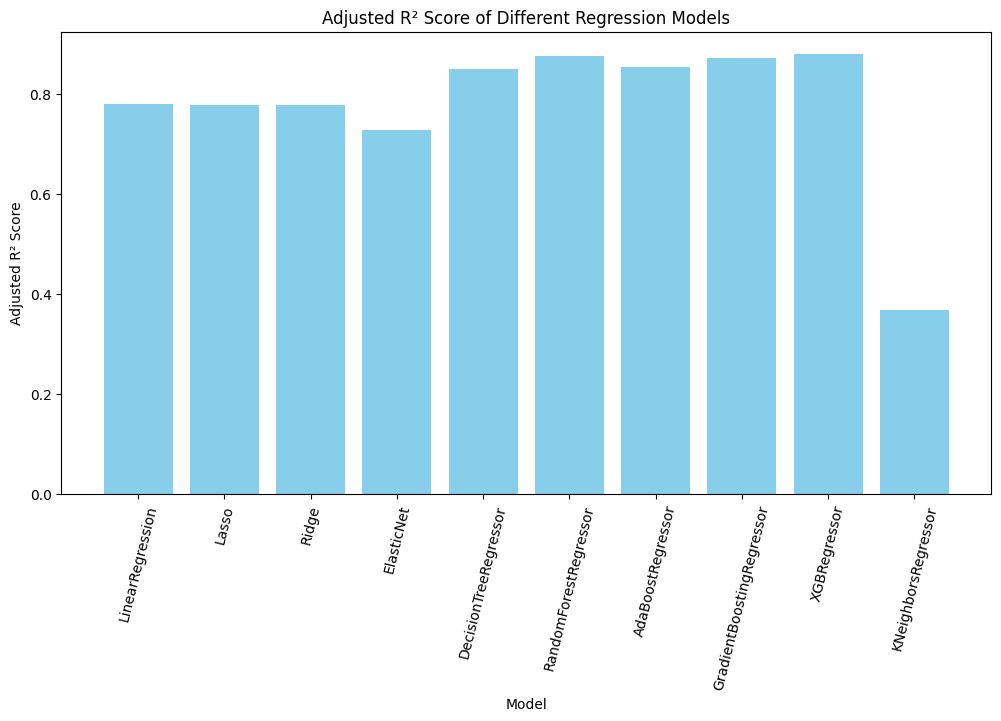

In [ ]:
# Plotting the adjusted R² scores
plt.figure(figsize=(12, 6))
plt.bar(adjusted_r2_scores.keys(), adjusted_r2_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Adjusted R² Score')
plt.title('Adjusted R² Score of Different Regression Models')
plt.xticks(rotation=76)
plt.show()

In [ ]:
plt.savefig('adjusted_r2_scores.png')

<Figure size 640x480 with 0 Axes>